Estos datos fueron previamente utilizados en el experimento de psicología cognitiva y representan diferentes condiciones de un experimento.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Obtener datos

In [2]:
df = pd.read_csv('globos.csv', header=None)
df.rename(columns = {0:'Color', 1:'Size', 2:'Prof', 3:'Age', 4:'Status'}, inplace = True)
df.head(10)

,Color,Size,Prof,Age,Status
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,T
7,YELLOW,LARGE,DIP,ADULT,T
8,YELLOW,LARGE,DIP,CHILD,F
9,YELLOW,LARGE,DIP,CHILD,F


## Procesar datos

Ya que el modelo solo acepta valores numéricos y el dataset contiene valores nominales es necesario antes del entrenamiento encodear los valores para que tengan un valor numérico.

In [3]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head(10)

,Color,Size,Prof,Age,Status
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,0,0,1
3,1,1,0,1,0
4,1,1,0,1,0
5,1,0,1,0,1
6,1,0,1,1,1
7,1,0,0,0,1
8,1,0,0,1,0
9,1,0,0,1,0


### Obtener subconjunto de atributos

In [4]:
data=df.values[:,0:4]
data

array([[1, 1, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

### Obtener subconjunto de clases

In [5]:
target=df.values[:,4]
target

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0])

## Crear conjuntos de entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

## Entrenar modelo

In [7]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

## Obtener predicciones

In [8]:
y_pred = gnb.predict(X_test)
y_pred 

array([1, 0, 0, 1, 0, 1])

## Comprobar las predicciones

In [9]:
metrics.accuracy_score(y_test, y_pred)

1.0

/home/estebanrivas/Repositorios/UM/IA-2021/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


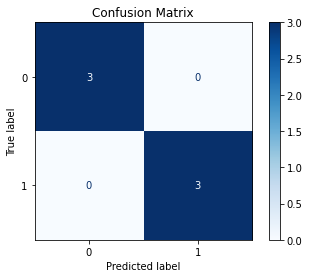

In [10]:
metrics.confusion_matrix(y_test, y_pred)

disp = metrics.plot_confusion_matrix(gnb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()